In [1]:
#tensorflow.debugging.set_log_device_placement(True)

# !pip install opencv-python

import cv2
import keras
import random
import GPyOpt as gy
import noise as ns
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os

import time as time


mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False


tf.config.list_physical_devices('GPU')
#tf.test.is_built_with_cuda()

2023-12-03 23:59:32.630483: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


[]

In [3]:
main_path = os.path.dirname(os.path.abspath("Main.ipynb")) #path of main folder
data_path = os.path.join(main_path, "valid") #path of validation data

images = {}
classfiles = os.listdir(data_path)
print(classfiles)

classfiles.sort()
mapping = dict()
for idx in range(len(classfiles)):
    mapping[classfiles[idx]] = idx
    
for clf in classfiles:
    images[clf] = os.listdir(os.path.join(data_path,clf))


['BROOKES BIRDWING', 'RED SPOTTED PURPLE', 'WOOD SATYR', 'PAPER KITE', 'GREY HAIRSTREAK', 'STRAITED QUEEN', 'MONARCH', 'ELBOWED PIERROT', 'COMET MOTH', 'METALMARK', 'PURPLE HAIRSTREAK', 'QUESTION MARK', 'BECKERS WHITE', 'IO MOTH', 'CHECQUERED SKIPPER', 'EASTERN COMA', 'BROWN ARGUS', 'MOURNING CLOAK', 'EASTERN DAPPLE WHITE', 'BLUE MORPHO', 'PURPLISH COPPER', 'LARGE MARBLE', 'HUMMING BIRD HAWK MOTH', 'LUNA MOTH', 'CINNABAR MOTH', 'Iphiclus sister', 'GREEN HAIRSTREAK', 'WHITE LINED SPHINX MOTH', 'CLEARWING MOTH', 'BANDED PEACOCK', 'JULIA', 'CLOUDED SULPHUR', 'GARDEN TIGER MOTH', 'ORANGE OAKLEAF', 'SLEEPY ORANGE', 'HERCULES MOTH', 'GREEN CELLED CATTLEHEART', 'SIXSPOT BURNET MOTH', 'YELLOW SWALLOW TAIL', 'COPPER TAIL', 'BLACK HAIRSTREAK', 'ORANGE TIP', 'AMERICAN SNOOT', 'MILBERTS TORTOISESHELL', 'GREAT JAY', 'ATALA', 'EMPEROR GUM MOTH', 'ATLAS MOTH', 'MALACHITE', 'GOLD BANDED', 'POLYPHEMUS MOTH', 'PIPEVINE SWALLOW', 'VICEROY', 'SOOTYWING', 'PAINTED LADY', 'APPOLLO', 'BIRD CHERRY ERMINE MOTH

In [4]:
images

{'ADONIS': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'AFRICAN GIANT SWALLOWTAIL': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'AMERICAN SNOOT': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'AN 88': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'APPOLLO': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'ARCIGERA FLOWER MOTH': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'ATALA': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'ATLAS MOTH': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BANDED ORANGE HELICONIAN': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BANDED PEACOCK': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BANDED TIGER MOTH': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BECKERS WHITE': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BIRD CHERRY ERMINE MOTH': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BLACK HAIRSTREAK': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BLUE MORPHO': ['1.jpg', '4.jpg', '5.jpg', '3.jpg', '2.jpg'],
 'BLUE SPO

In [6]:
# pretrained_model = tf.keras.applications.InceptionV3(
#                                                      weights='imagenet')
pretrained_model = keras.models.load_model("EfficientNetB0_butterfly.h5", custom_objects={'F1_score':'F1_score'}) 
pretrained_model.trainable = False

# ImageNet labels
# decode_predictions = lambda prob, k : np.argsort(prob, axis=1)[:, -1*k:]

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
    return np.argsort(probs*-1, axis=1)[:, :6]

imagesize = 224

2023-12-04 00:07:54.699965: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
rawimage = Image.open("valid/ARCIGERA FLOWER MOTH/1.jpg")
image = tf.keras.preprocessing.image.img_to_array(rawimage)

image = tf.cast(image, tf.float32)
image = image/255
image = tf.image.resize(image, (imagesize, imagesize))
image = image[None, ...]

print(np.argsort(pretrained_model.predict(image*255, steps=1)*-1))
# print(np.sort(pretrained_model.predict(image*255, steps=1)))

get_imagenet_label(pretrained_model.predict(image*255, steps=1))

1/1 [==============================] - 1s 1s/step
[[ 5 44 92 41 39 40 30 14 29 89 36 10 31 43 75 83 90  0  4 79 33 17 26 84
  52 50 49 93 97  7 53 25 13 66  9 24 48 64 74 21  6 65 23 28 35 12 42 38
  45 78 85 98 32 73 20 37 99 15 95 88 60 77 94  2 54 27 67 86 51 61 87 47
  22 11 76 62 69 57 82 91 72 96 55 68 58  8 70 19 81 63 56  1 59 34 18 80
  71 46 16  3]]
1/1 [==============================] - 0s 41ms/step


array([[ 5, 44, 92, 41, 39, 40]])

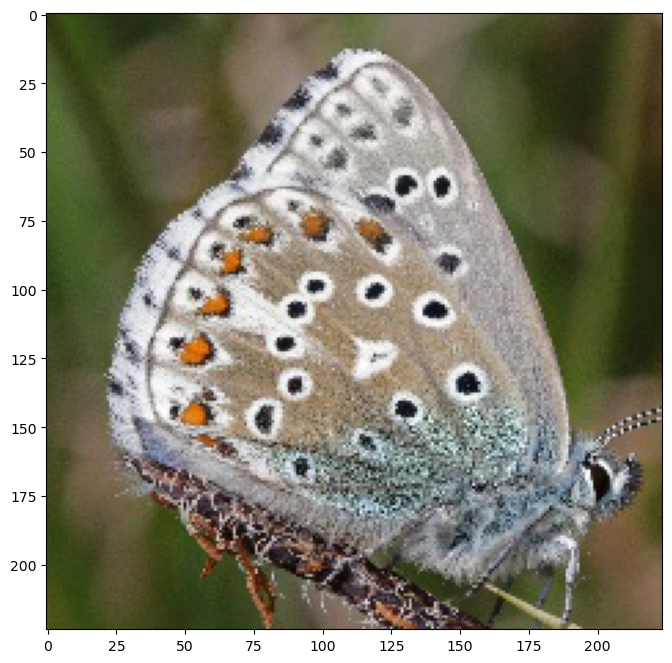

tf.Tensor(
[[ 47.  59.  19.]
 [ 49.  61.  21.]
 [ 53.  66.  23.]
 [ 52.  65.  22.]
 [ 58.  74.  27.]
 [ 59.  77.  27.]
 [ 60.  80.  27.]
 [ 55.  76.  20.]
 [ 56.  80.  22.]
 [ 53.  77.  19.]
 [ 50.  74.  16.]
 [ 50.  73.  17.]
 [ 55.  75.  24.]
 [ 49.  67.  19.]
 [ 54.  69.  26.]
 [ 54.  67.  24.]
 [ 47.  65.  23.]
 [ 49.  67.  27.]
 [ 51.  67.  28.]
 [ 44.  60.  21.]
 [ 46.  60.  24.]
 [ 45.  56.  22.]
 [ 43.  54.  20.]
 [ 40.  49.  18.]
 [ 39.  48.  19.]
 [ 40.  49.  20.]
 [ 40.  49.  22.]
 [ 41.  50.  23.]
 [ 41.  50.  23.]
 [ 40.  49.  22.]
 [ 37.  47.  22.]
 [ 36.  46.  21.]
 [ 37.  47.  20.]
 [ 38.  48.  21.]
 [ 37.  47.  20.]
 [ 38.  48.  21.]
 [ 38.  51.  23.]
 [ 40.  53.  25.]
 [ 40.  53.  25.]
 [ 38.  51.  23.]
 [ 35.  50.  21.]
 [ 37.  52.  23.]
 [ 37.  50.  22.]
 [ 38.  51.  23.]
 [ 42.  55.  29.]
 [ 43.  56.  30.]
 [ 40.  53.  27.]
 [ 39.  52.  26.]
 [ 46.  61.  28.]
 [ 48.  63.  30.]
 [ 47.  63.  27.]
 [ 56.  70.  34.]
 [ 58.  72.  36.]
 [ 68.  80.  42.]
 [ 68.  78.  41.]

array([[ 0, 21, 49, 32, 77, 78]])

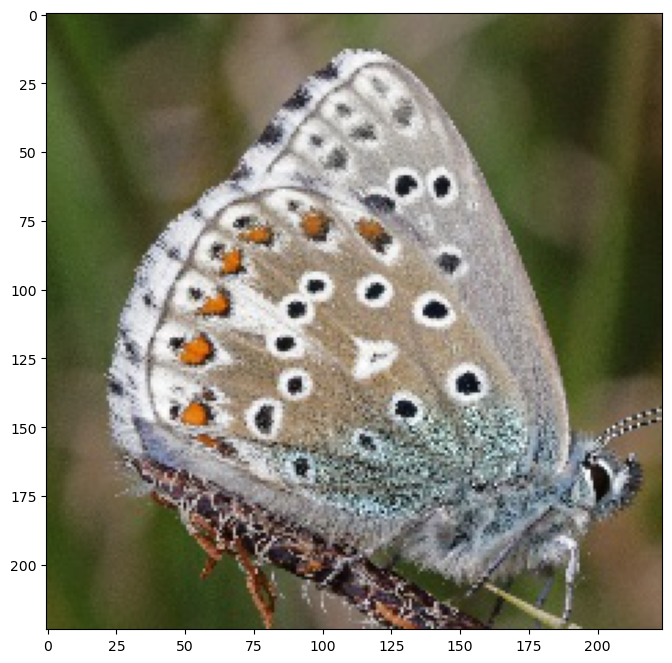

In [11]:
rawimage = Image.open("valid/ADONIS/1.jpg")
image = tf.keras.preprocessing.image.img_to_array(rawimage)

plt.figure()
plt.imshow(rawimage)
plt.show()

image = tf.cast(image, tf.float32)
print(image[0])
image = image/255
image = tf.image.resize(image, (imagesize, imagesize))
image = image[None, ...]

plt.imshow(image[0])

print(np.argsort(pretrained_model.predict(image*255, steps=1)*-1))

get_imagenet_label(pretrained_model.predict(image*255, steps=1))

In [43]:
class randomimg:
    
    def __init__(self):
        while True:
            print("NEW INSTANCE")
            self.count = 0
            cls = random.choice(classfiles)
            # print(images[cls])
            imgfile = random.choice(images[cls])
            # imgfile = images[cls]
            imgpath = os.path.join(data_path, cls+"/"+imgfile)
            # imgpath = imgfile
            # print(cls)
            print(imgfile)
            print(imgpath)
                
            rawimage = Image.open(imgpath)
            image = tf.keras.preprocessing.image.img_to_array(rawimage)

            image = tf.cast(image, tf.float32)
            image = image/255
            image = tf.image.resize(image, (imagesize, imagesize))
            image = image[None, ...]
            
            self.imgplot = rawimage 

            # print(np.shape(image))
            
            if np.shape(image) == (1,imagesize,imagesize,1):
                image = tf.image.grayscale_to_rgb(image)
            elif np.shape(image) == (1,imagesize,imagesize,4):
                image = tf.image.grayscale_to_rgb(image)
                
            # print(np.shape(image))
            self.img = image
            # print("Pre query 1")
#             print(pretrained_model.predict(image*255, steps=1))
            # print(np.argsort(pretrained_model.predict(image*255, steps=1), axis=1)[:, -6:])
            self.image_probs = get_imagenet_label(pretrained_model.predict(image*255, steps=1))
            # print(self.image_probs)
            # print("Query 1")
#             self.labelindex = np.argmax(pretrained_model.predict(image*255, steps=1))
            origpredictions = self.image_probs[0, 0]

            actualprediction = mapping[os.path.basename(os.path.dirname(imgpath))]
        
            # print(origpredictions)
            # print(actualprediction)

            # print(self.image_probs)

            if self.image_probs[0, 0] == actualprediction:
                print(f"Imagenet prediction: {self.image_probs[0, 0]}")
                print(f"Label: {actualprediction}")

                break

    def decision(self,img):
        self.count += 1
        # print(f"Count: {self.count}")
        check = get_imagenet_label(pretrained_model.predict(img*255, steps=1, verbose=0))
        # print("Query")
        if check[0, 0] != self.image_probs[0, 0]:
            return True
        else:
            return False


In [44]:
def display_images(image):
    # guessdata = get_imagenet_label(pretrained_model.predict(image*255, steps=1))
    # for guess in guessdata:
    #     print(guess[1] + ": " + str(guess[2]))
        
    plt.figure()
#     print(type(image[0]))
#     print(tf.cast(image[0], tf.uint32))
#     plt.imshow(tf.cast(image[0], tf.uint32))
    # print(image[0])
    plt.imshow(image[0])
 # plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                 #  label, confidence*100))
    plt.show()

In [45]:
def norm (image, image2):
    y = image[0]
    z = image2[0]
    l2norm = tf.norm(np.subtract(z,y), ord=2).numpy()
    infnorm = tf.norm(np.subtract(z,y), ord=np.inf).numpy()
    return l2norm, infnorm

In [46]:
def select_delta(dist, l, cur_iter, theta, d):
    if cur_iter == 1:
        delta = 0.1
    else:
        if l == 'l2':
            delta=np.sqrt(d)*theta*dist
        elif l == 'linf':
            delta=np.sqrt(d)*theta*dist
    return delta

In [47]:
def clip_image(image, clip_min, clip_max):
	# Clip an image, or an image batch, with upper and lower threshold.
	return np.minimum(np.maximum(clip_min, image), clip_max)

NEW INSTANCE
2.jpg
/home/ehs28/Adversarial-Black-Box-Attacker/HSJattack/valid/HERCULES MOTH/2.jpg
1/1 [==============================] - 0s 44ms/step
Imagenet prediction: 50
Label: 50


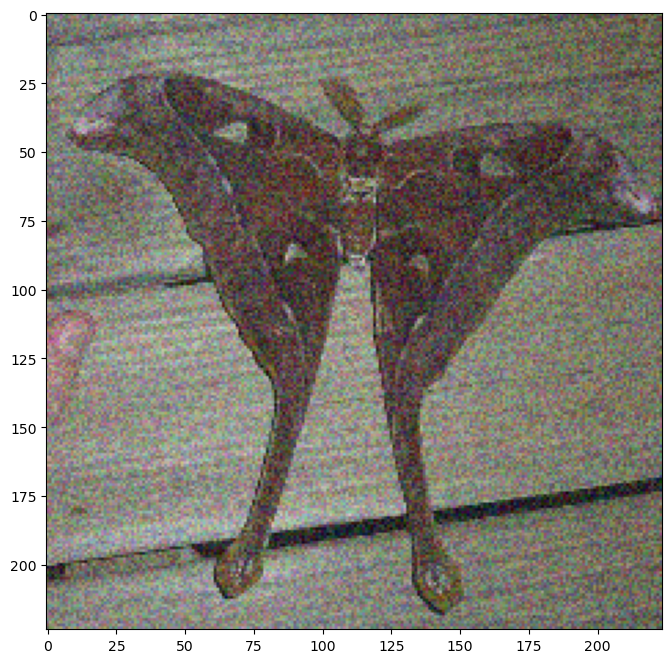

In [48]:
def random_noise_hsja(imgobj):
    tries = 0
    while tries < 1000:
        tries += 1
        noise = np.random.uniform(0,1,[1,imagesize,imagesize,3])
        if imgobj.decision(noise):
            break
    
    lo = 0.0
    hi = 1.0
    while hi - lo > 0.001:
        mid = (hi + lo) / 2.0
        blended = (1 - mid) * imgobj.img + mid * noise 
        if imgobj.decision(blended):
            hi = mid
        else:
            lo = mid
    
    final = (1 - hi) * imgobj.img + hi * noise
    return final

i = randomimg()
display_images(random_noise_hsja(i))

In [49]:
def project(original_image, perturbed_image, alphas, l):
    
    #alphas_shape = len(original_image.shape)
    #alphas = alphas.reshape(alphas_shape)
    if l == 'l2':
        return (1-alphas) * original_image + alphas * perturbed_image
    elif l == 'linf':
        out_images = clip_image(
            perturbed_image, 
            original_image - alphas, 
            original_image + alphas
        )
        return out_images
    
def binary_search_hsja(perturbed, imgobj, theta, l='l2'):
    
    distances = []
    for p in perturbed:
        if l == 'l2':
            distances.append(norm(p, imgobj.img)[0])
        else:
            distances.append(norm(p, imgobj.img)[1])    
    distances = np.array(distances)
    if l == 'linf':
        highs = distances
        thresholds = np.minimum(distances * theta, theta)
    else:
        highs = np.ones(len(perturbed))
        thresholds = theta

    lows = np.zeros(len(perturbed))
    
    while np.max((highs - lows) / thresholds) > 1:
        
        mids = (highs + lows) / 2.0
        
        decisions = np.array([])
        
        for p in range(len(perturbed)):
            mid_image = project(imgobj.img, perturbed[p], mids[p], l)
            d = imgobj.decision(mid_image)
            decisions = np.append(decisions, [d])
            
        # Update highs and lows based on model decisions.
        
        lows = np.where(decisions == 0, mids, lows)
        highs = np.where(decisions == 1, mids, highs)


    outputs = [project(imgobj.img, perturbed[p], highs[p], l) for p in range(len(perturbed))]
    
    finaldists = []
    for p in perturbed:
        if l == 'l2':
            finaldists.append(norm(p, imgobj.img)[0])
        else:
            finaldists.append(norm(p, imgobj.img)[1])
            
    idx = np.argmin(finaldists)

    dist = distances[idx]
    out_image = outputs[idx]
    return out_image, dist

        


#fin = binary_search_hsja([random_noise_hsja(im),random_noise_hsja(im)], im, theta, 'l2')

#print("Dist: "+str(fin[1]))

#delt  = select_delta(fin[1],constraint, 2, theta, d)

In [50]:
def approximate_gradient(sample, num_evals, delta, l):
    clip_max=1
    clip_min =1

    noise_shape = [num_evals] + list(sample.shape)
    if l == 'l2':
        rv = np.random.randn(*noise_shape)
    elif l == 'linf':
        rv = np.random.uniform(low = -1, high = 1, size = noise_shape)
    
    rv = rv / np.sqrt(np.sum(rv ** 2, axis = (1,2,3), keepdims = True))
    perturbed = sample + delta * rv
    #perturbed = clip_image(perturbed, clip_min, clip_max)
    rv = (perturbed - sample) / delta
    
    decisions = np.array([])
    for i in range(num_evals):
        check1 = get_imagenet_label(pretrained_model.predict(perturbed[i]*255, steps=1, verbose=0))
        check2 = get_imagenet_label(pretrained_model.predict(sample*255, steps=1, verbose=0))
        boolean = [check1[0][0] != check2[0][0]]
        decisions = np.append(decisions, boolean)

    decision_shape = [len(decisions)] + [1] * len(sample.shape)
    fval = 2 * decisions.astype(float).reshape(decision_shape) - 1.0

    if np.mean(fval) == 1.0: # label changes. 
        gradf = np.mean(rv, axis = 0)
    elif np.mean(fval) == -1.0: # label not change.
        gradf = - np.mean(rv, axis = 0)
    else:
        fval -= np.mean(fval)
        gradf = np.mean(fval * rv, axis = 0) 

    # Get the gradient direction.
    gradf = gradf / np.linalg.norm(gradf)

    return gradf

#gradf = approximate_gradient(fin[0], 50, delt, constraint)
#display_images(i)

In [51]:
def geometric_progression(x, update, dist, cur_iter):

    epsilon = dist / np.sqrt(cur_iter) 

    def phi(epsilon):
        new = x + epsilon * update
        check1 = get_imagenet_label(pretrained_model.predict(new*255, steps=1))
        check2 = get_imagenet_label(pretrained_model.predict(x*255, steps=1))
        success = [check1[0][0] != check2[0][0]]
        return success

    while not phi(epsilon):
        epsilon /= 2.0

    return epsilon

#geometric_progression(fin[0], gradf, fin[1], 20)

NEW INSTANCE
4.jpg
/home/ehs28/Adversarial-Black-Box-Attacker/HSJattack/valid/ULYSES/4.jpg
1/1 [==============================] - 0s 45ms/step
Imagenet prediction: 94
Label: 94
start
Select Delta Time: 2.384185791015625e-06
Delta0.1
Approximate Gradient Time: 22.51251459121704
1/1 [==============================] - 0s 71ms/step
Geometric Progression Time: 0.24259066581726074
0.452281653881073
Binary Search Time: 4.029058218002319
iteration: 1, linf distance 2.0134E-01
start
Select Delta Time: 1.2159347534179688e-05
Delta3.4474869181026826e-09
Approximate Gradient Time: 30.898205757141113
1/1 [==============================] - 0s 65ms/step
Geometric Progression Time: 0.21175312995910645
0.1423683874939796
Binary Search Time: 3.8261919021606445
iteration: 2, linf distance 2.7581E-01
start
Select Delta Time: 1.239776611328125e-05
Delta4.722658218397705e-09
Approximate Gradient Time: 39.36028337478638
1/1 [==============================] - 0s 51ms/step
Geometric Progression Time: 0.2143135

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Binary Search Time: 3.8556318283081055
iteration: 30, linf distance 3.2212E-01


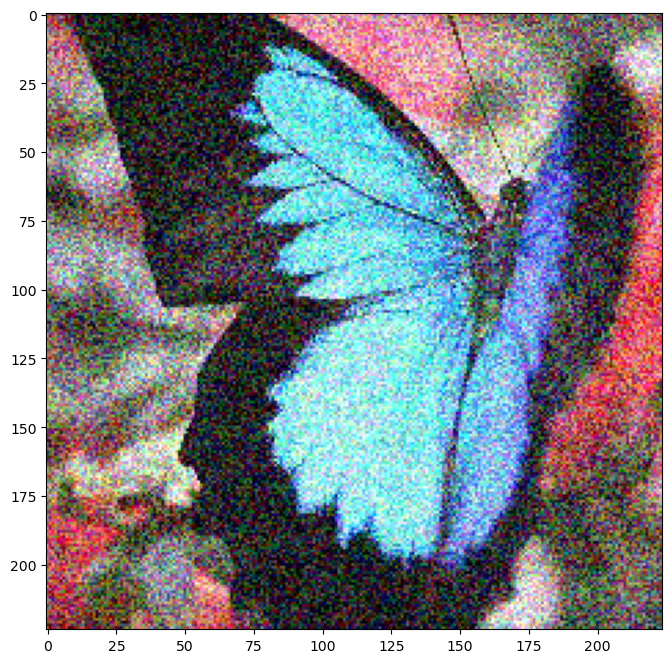

In [52]:
def hsja(imgobj, #instance of class randomimg
            constraint = 'l2',
            num_iterations = 30,
            gamma = 1,
            max_num_evals = 1e4,
            init_num_evals = 100,
            verbose = True
            ):
    d = np.prod(imgobj.img.shape)
    
    if constraint == 'l2':
        theta = gamma / d**(3/2)
    else:
        theta = gamma / d**2
        
    perturbed = random_noise_hsja(imgobj)
    
    perturbed, dist_post = binary_search_hsja([perturbed], imgobj, theta, constraint)
    
    if constraint == 'l2': 
        
        dist = norm(perturbed, imgobj.img)[0]
        print(dist)
    else:
        dist = norm(perturbed, imgobj.img)[1]
    
    for j in np.arange(num_iterations):
        print('start')
        c_iter = j + 1

        # Choose delta.
        start_time = time.time()
        delta = select_delta(dist, constraint, c_iter, theta, d)
        print('Select Delta Time:', time.time() - start_time)

        print("Delta" + str(delta))
        # Choose number of evaluations.
        num_evals = int(init_num_evals * np.sqrt(c_iter))
        num_evals = int(min([num_evals, max_num_evals]))
        
        # approximate gradient.
        start_time = time.time()
        gradf = approximate_gradient(perturbed, num_evals, 
            delta, constraint)
        print('Approximate Gradient Time:', time.time() - start_time)
        
        if constraint == 'linf':
            update = np.sign(gradf)
        else:
            update = gradf
        # find step size.
        start_time = time.time()
        epsilon = geometric_progression(perturbed, 
        update, dist, c_iter)
        print('Geometric Progression Time:', time.time() - start_time)
        print(epsilon)
        # Update the sample. 
        perturbed =  perturbed + epsilon * update

        # Binary search to return to the boundary. 
        start_time = time.time()
        perturbed, dist_post = binary_search_hsja(perturbed, imgobj, theta, constraint)
        print('Binary Search Time:', time.time() - start_time)
        
        # compute new distance.
        if constraint == 'l2': 
            dist = norm(perturbed, imgobj.img)[0]
        else:
            dist = norm(perturbed, imgobj.img)[1]
            
        if verbose:
            print('iteration: {:d}, {:s} distance {:.4E}'.format(j+1, constraint, dist))

    return perturbed

i = randomimg()
hsja = hsja(i, constraint = 'linf', num_iterations=30)
display_images(hsja)

In [31]:
i.count

1158

In [35]:
pretrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      